### Instructions:

1. Import all the libraries you need in the cell below
2. Create as many cells as needed to answer a question
  * Group code that is logically related in the same cell
  * Keep cells relatively small
  * Format long statements or expressions, including `ggplot`, across multiple lines
3. Submit your work to Github
  * Folder should be called `week_4_practical`
  * This file should be called `week_4_solution.ipynb`
    

In [69]:
library(ggplot2)
library(tidyverse)

### Q.1

* Write a function that manually computes the standard deviation.
  * Call your function `sd_x`

Recall that the standard deviation is computed as

$$
\sigma = \sqrt{\frac{\sum{(x_i - \mu)^2}}{N-1}}
$$

* $\mu$ is simply the mean of the vector of inputs
  * it can be computed using the `mean` function


For example, given:

```x = c(1,2,3)```

Since $\mu = 2$, then $\sigma = \sqrt{\frac{(1-2)^2 + (2-2)^2 + (3-2)^2}{3}} = 1$.

* Important: What do you do if this function is called with a single element?
  * Recall that we cannot compute the std deviation of a single value

* Use `assertthat` to make sure that `sd_x` and `sd` return the same values for 3 test vectors of your choice.

In [6]:
##Code is found by first defining intermidiate values then defininig a "function"
x = c(3,6,9)
mean_x = mean(c(3,6,9))
N = (length(x)-1)

sd_x <- function(x){
   sqrt(sum((x - mean_x)^2)/N)
    }

In [7]:
print(mean_x)
print(N)

sd_x(x)

[1] 6
[1] 2


[1] 3

### Q2

* In this question, we will build a simulated dataset for healthy and diseased corals.  You will be creating a `tibble` called `coral_health_tbl` that contains 2 columns:

1. A column called `coral`. Generate this column by sampling 100 coral species from the following values
```
coral_pop = c("Montipora capitata",
  "Porites compressa",
  "Porites lobata")
```
 * You can use the function `sample` to select 100 values from the vector `coral_pop`
 
2. The second column is called `health_status`.
    * it represents 100 randomly selected `TRUE` or `FALSE` values that represent whether the coral is healthy or diseased.
    * Healthy corals (`health_status == FALSE`; not diseased) occur with a probability of 0.8 wheras diseased (`health_status == TRUE`) corals occur with a probability of 0.3.
    * You can use sample again but modify the `prob` parameter to account for the differet probabilities


In [8]:
coral_pop = c("Montipora capitata",
              "Porites compressa",
              "Porites lobata")
coral <- sample(coral_pop, size = 100, replace = TRUE)
health_status_logic = c(TRUE,
                        FALSE)
health_status <- sample(health_status_logic, size = 100, replace = TRUE, prob = c(0.2, 0.8))
coral_health <- data.frame(coral, health_status)

coral_health_tbl = as_tibble(coral_health)
print(coral_health_tbl)

# A tibble: 100 x 2
   coral              health_status
   <fct>              <lgl>        
 1 Montipora capitata FALSE        
 2 Porites compressa  FALSE        
 3 Montipora capitata FALSE        
 4 Porites compressa  TRUE         
 5 Montipora capitata FALSE        
 6 Porites lobata     FALSE        
 7 Montipora capitata FALSE        
 8 Porites lobata     TRUE         
 9 Montipora capitata FALSE        
10 Montipora capitata FALSE        
# ... with 90 more rows


In [39]:
?sample

### Q3

* Create a new column in `coral_health_tbl` called `coral_cover`
* This column represents coral cover values for the corals observed in your tibble

* For the healthy coral (`health_status = FALSE`), sample the cover values from a normal with mean 9 and std of 2
* For the diseased corals (`health_status = TRUE`), sample the cover values from a normal with mean 1 and std of 3
* Note that this is a perfect scenario for using `mapply`

In [9]:
return_cover <- function(x) {
  if (x == FALSE) {
    rnorm(1, 1, 3) 
  }else if(x == TRUE){
    rnorm(1, 9, 2)
      }
    }
return_cover(TRUE)
return_cover(FALSE)


[1] 7.058694

[1] -2.685516

In [48]:
coral_cover = mapply(return_cover, coral_health_tbl$health_status)
print(coral_cover)

  [1]  2.4367078  0.4764558  0.2292767  6.9267964  3.7868090  0.3991086
  [7] -2.2491433 12.0813658  4.2107003 -1.4229087  3.9120665  8.4026796
 [13]  2.5740410 -3.6242581 -0.1904642  5.2820654  1.2831976 -5.8156207
 [19]  5.0267088 10.4704995 -0.1621162  0.2892051 -1.0070907  8.8344275
 [25]  9.9836284  7.8979356 -1.7104826  5.6639271  9.3003553 12.4497738
 [31]  0.6666012 11.5486650  3.6633047  7.4583043  8.7605550  4.0091067
 [37]  0.9145132 -3.7006696  6.1484054 -0.3436038 10.0831009  1.1679027
 [43]  5.1388263  0.6150816 -0.2044054  5.1775987  1.6187172  4.2462326
 [49]  2.9182103 13.7778287  1.5269939 12.1546805  2.7975712  3.5041137
 [55]  2.0071538 10.4353587  7.0989973  2.9027727  0.8754374  9.3149193
 [61]  0.2628507 -1.6787489  0.9180008  4.8885283  3.5927475  2.0983300
 [67] 10.1825080  3.1949669  9.4976727 -0.3131984 -0.5536983  5.7316324
 [73] -0.5646689  1.4424364 -4.9277745  6.3344600  8.7963256  0.9572981
 [79]  8.0852491 -1.1981120  3.1478991  2.6650274  8.7830991 -1.

In [45]:
coral_cover_tbl = data.frame(coral, health_status, coral_cover)
coral_cover_tbl

coral,health_status,coral_cover
Montipora capitata,FALSE,0.8052415
Porites compressa,FALSE,0.6087294
Montipora capitata,FALSE,-0.9031795
Porites compressa,TRUE,8.3465690
Montipora capitata,FALSE,1.3893098
Porites lobata,FALSE,-1.7200978
Montipora capitata,FALSE,5.9012118
Porites lobata,TRUE,12.2443006
Montipora capitata,FALSE,-0.5059720
Montipora capitata,FALSE,0.2457116


### Q4

* Add another column called `binary_health_status`.
 * set the column to 0 if `health_status == FALSE`
 * set the column to 1 if `health_status == TRUE`

* A trick here is to remember that:
  1. Corecing (converting) a logical can be done with `as.integer()`
  2. `as.integer(TRUE)` returns 1
  3. `as.integer(FALSE)` returns 0




In [24]:
as.integer(FALSE)
as.integer(TRUE)


[1] 0

[1] 1

In [47]:
str(coral_cover_tbl)

'data.frame':	100 obs. of  3 variables:
 $ coral        : Factor w/ 3 levels "Montipora capitata",..: 1 2 1 2 1 3 1 3 1 1 ...
 $ health_status: logi  FALSE FALSE FALSE TRUE FALSE FALSE ...
 $ coral_cover  : num  0.805 0.609 -0.903 8.347 1.389 ...


In [26]:
as.integer(FALSE)

[1] 0

In [27]:
binary_health_status <- sapply(coral_cover_tbl$health_status, as.integer)
binary_health_status

[1] 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 1 1 0 1 0 0 1 0 0
 [38] 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0
 [75] 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0

In [28]:
coral_cover_health_tbl = data.frame(coral, health_status, coral_cover, binary_health_status)
coral_cover_health_tbl

coral,health_status,coral_cover,binary_health_status
Montipora capitata,FALSE,0.8052415,0
Porites compressa,FALSE,0.6087294,0
Montipora capitata,FALSE,-0.9031795,0
Porites compressa,TRUE,8.3465690,1
Montipora capitata,FALSE,1.3893098,0
Porites lobata,FALSE,-1.7200978,0
Montipora capitata,FALSE,5.9012118,0
Porites lobata,TRUE,12.2443006,1
Montipora capitata,FALSE,-0.5059720,0
Montipora capitata,FALSE,0.2457116,0


### Q5

* Plot the distribution of `coral_cover` for healthy versus diseased corals
* Note that I am using a histogram `geom`
  * Histograms need only a `x` axis because the `y` is computed (count)
    * However, instead of a raw count, we want a normalized count. You can normalize the count by setting `y = stat(count / sum(count))`  
  * I am coloring the bin outlines in black and filling in grey for disease and white for healthy
  * I am using `binwidth=1'.
* use the `labs` function to add a title and to change the labels for the `x` and `y` axes
* The plot should look like the following
![](https://www.dropbox.com/s/wdbdj05rd50vb0k/healthy-diseased.png?dl=1)

In [96]:
?geom_histogram

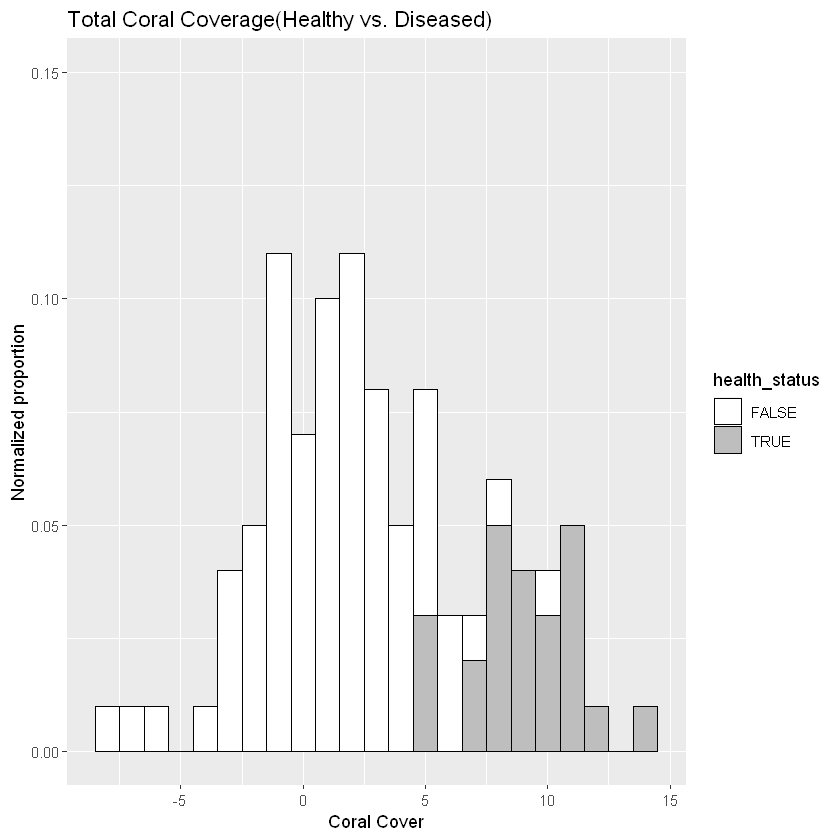

In [112]:
ggplot(coral_cover_tbl, aes(x = coral_cover, health_status)) +
  geom_histogram(aes(x=coral_cover, y=stat(count / sum(count)), fill= health_status), 
                  colour="black", binwidth = 1)+
 scale_fill_manual(values=c("white", "grey")) +
 labs(x="Coral Cover", y="Normalized proportion", title="Total Coral Coverage(Healthy vs. Diseased)")+ 
 ylim(0.00, 0.15)

### Q6.

* Repeat the plot above by highlighting the distribution per species
* I am using `geom_density`
  * set the `adjust` param of `geom_density` to `2`
* Change the `xlim` scale so that we can see the edges of the curves
  * I.e., curves should not be cutoff


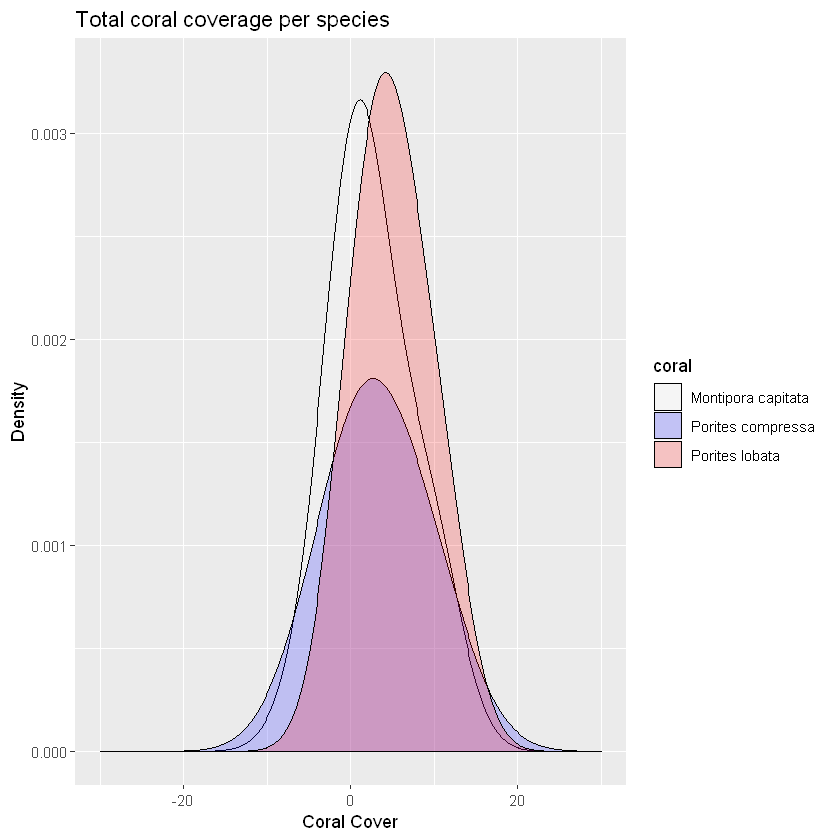

In [113]:
ggplot(coral_health_tbl) +
  geom_density(aes(x=coral_cover, y=stat(count / sum(count)), fill=coral), 
                  colour="black", alpha=0.2, adjust=2)+
 scale_fill_manual(values=c("white", "Blue", "red")) +
 labs(x="Coral Cover", y="Density", title="Total coral coverage per species")+ 
 xlim(-30, 30)



### Q6 -- Challenge


Recall problem `8` in the airquality dataset.
  * Remember that you can import that dataset using `data(airquality)`
1. Convert the `airquality` dataframe to a tibble called `airq_tbl`
2. Replace the missing values for Solar.R using that month's average.
    * Example:
        * The missing value for line 6 in `airq_tbl`should be replaced with the average for month 5.
        * The missing value for line 97 in `airq_tbl` should be replaced with the average for month 8.

* Strategy:
  1. Compute the average values for months 5, 6, 7, 8, and 9 in a names vector called `monthly_avg_SolarR`
      * monthly_avg_SolarR[5] should return the average for May.
      * monthly_avg_SolarR[6] should return the average for June.
      * etc.
      * This is an ideal use case for `tapply` with `na.rm=TRUE` (ask me!)
  2. for each line of airq_tbl check value of Solar.R and do:
    * if value is not `na`, return the value
    * if value if `na`; return avg associated with `Month`
    * This is an ideal case for `apply`
      * You need to write your own function (call it `fix_missing_solar_R`)
      * Recall that the argument to that function is a complete row as a vector!
    * test your function with the following line to make sure it's working
    ```fix_missing_solar_R(airq_tbl[5,])```

In [115]:
data(airquality)
airq_tbl = as_tibble(airquality)
head(airq_tbl)

Ozone,Solar.R,Wind,Temp,Month,Day
41,190,7.4,67,5,1
36,118,8.0,72,5,2
12,149,12.6,74,5,3
18,313,11.5,62,5,4
NA,NA,14.3,56,5,5
28,NA,14.9,66,5,6


In [116]:
monthly_avg_SolarR = tapply(airq_tbl$Solar.R, airq_tbl$Month, mean, na.rm=TRUE)
monthly_avg_SolarR
monthly_avg_SolarR[as.character(5)]

5        6        7        8        9 
181.2963 190.1667 216.4839 171.8571 167.4333

5 
181.2963

In [117]:
monthly_avg_SolarR = tapply(airq_tbl$Solar.R, airq_tbl$Month, mean, na.rm=TRUE)

fix_missing_solar_R = function(x){
    
    if(is.na(x["Solar.R"])){
        monthly_avg_SolarR[as.character(x["Month"])]
    }else{
        x["Solar.R"]
    }   
}
fix_missing_solar_R(airq_tbl[5,])

5 
181.2963

In [118]:
SolarR_fixed = apply(airq_tbl, 1, fix_missing_solar_R)
SolarR_fixed

[1] 190.0000 118.0000 149.0000 313.0000 181.2963 181.2963 299.0000  99.0000
  [9]  19.0000 194.0000 181.2963 256.0000 290.0000 274.0000  65.0000 334.0000
 [17] 307.0000  78.0000 322.0000  44.0000   8.0000 320.0000  25.0000  92.0000
 [25]  66.0000 266.0000 181.2963  13.0000 252.0000 223.0000 279.0000 286.0000
 [33] 287.0000 242.0000 186.0000 220.0000 264.0000 127.0000 273.0000 291.0000
 [41] 323.0000 259.0000 250.0000 148.0000 332.0000 322.0000 191.0000 284.0000
 [49]  37.0000 120.0000 137.0000 150.0000  59.0000  91.0000 250.0000 135.0000
 [57] 127.0000  47.0000  98.0000  31.0000 138.0000 269.0000 248.0000 236.0000
 [65] 101.0000 175.0000 314.0000 276.0000 267.0000 272.0000 175.0000 139.0000
 [73] 264.0000 175.0000 291.0000  48.0000 260.0000 274.0000 285.0000 187.0000
 [81] 220.0000   7.0000 258.0000 295.0000 294.0000 223.0000  81.0000  82.0000
 [89] 213.0000 275.0000 253.0000 254.0000  83.0000  24.0000  77.0000 171.8571
 [97] 171.8571 171.8571 255.0000 229.0000 207.0000 222.0000 137.0000 192.0000
[105] 273.0000 157.0000  64.0000  71.0000  51.0000 115.0000 244.0000 190.0000
[113] 259.0000  36.0000 255.0000 212.0000 238.0000 215.0000 153.0000 203.0000
[121] 225.0000 237.0000 188.0000 167.0000 197.0000 183.0000 189.0000  95.0000
[129]  92.0000 252.0000 220.0000 230.0000 259.0000 236.0000 259.0000 238.0000
[137]  24.0000 112.0000 237.0000 224.0000  27.0000 238.0000 201.0000 238.0000
[145]  14.0000 139.0000  49.0000  20.0000 193.0000 145.0000 191.0000 131.0000
[153] 223.0000